## Jacknife

The jackknife is a resampling technique especially useful for variance and bias estimation. The jackknife pre-dates other common resampling methods such as the bootstrap. The jackknife estimator of a parameter is found by systematically leaving out each observation from a dataset and calculating the estimate and then finding the average of these calculations. Given a sample of size ${\displaystyle n}$, the jackknife estimate is found by aggregating the estimates of each ${\displaystyle (n-1)}$-sized sub-sample.

[Reference](https://en.wikipedia.org/wiki/Jackknife_resampling)

The jackknife estimate of a parameter can be found by estimating the parameter for each subsample omitting the i-th observation. For example, if the parameter to be estimated is the population mean of x, we compute the mean ${\displaystyle {\bar {x}}_{i}}$ for each subsample consisting of all but the i-th data point:

${\displaystyle {\bar {x}}_{i}={\frac {1}{n-1}}\sum _{j=1,j\neq i}^{n}x_{j},\quad \quad i=1,\dots ,n.}$
These n estimates form an estimate of the distribution of the sample statistic if it were computed over a large number of samples. In particular, the mean of this sampling distribution is the average of these n estimates:

${\displaystyle {\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}{\bar {x}}_{i}.}$
One can show explicitly that this ${\displaystyle {\bar {x}}}$ equals the usual estimate ${\displaystyle {\frac {1}{n}}\sum _{i=1}^{n}x_{i}}$, so the real point emerges for higher moments than the mean. A jackknife estimate of the variance of the estimator can be calculated from the variance of this distribution of ${\displaystyle {\bar {x}}_{i}}$

${\displaystyle \operatorname {Var} ({\bar {x}})={\frac {1}{n-1}}\sum _{i=1}^{n}({\bar {x}}_{i}-{\bar {x}})^{2}={\frac {1}{n(n-1)}}\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}.}$

In [1]:
import numpy as np
original_sample = np.random.randn(100)

# number of resamples
n=len(original_sample)
# The medians of the resamples
medians = []
# Remove one  out to get the jackknife resample 
for i in range(n):
    re_sample = original_sample[np.arange(n) != i]
    medians.append(np.median(re_sample))

medians = np.array(medians)

# Calculate jackknife estimate and it's variance
median_bar = np.mean(medians)
var_bar = (n-1)*np.var(medians)

# ll = lower level of confidence interval, ul=upper level
ll = median_bar - 1.96*np.sqrt(var_bar)
up = median_bar + 1.96*np.sqrt(var_bar)
print("95% CI ")
print("lower = {}, upper = {}".format(ll, up))

95% CI 
lower = 0.08729150232238107, upper = 0.1318189771204143


## Bootstrapping
We have a sample data and want to infer about the parameter of a population.
This method resamples the sample data many times to simulate the sampling distribution. Resampling means sampling from the sample data with replacement.

Bootstrapping is a non-parametric method (no assumptions on distribution)

Bradley Efron published "Bootstrap methods: another look at the jackknife" (1979).
He received the International Prize in Statistics at the 2019 World Statistics Congress

<img src='https://newsroom.taylorandfrancisgroup.com/wp-content/uploads/2018/11/stat-award.png'>

According to research by Cornell University’s College of Agriculture and Life Sciences and EPAM Systems, Efron’s method has been referenced in more than 200,000 peer-reviewed journal articles since 1980, and in November 2018 he was awarded the International Prize in Statistics (IPS) for the creation of the bootstrap.

Harvard University’s Xiao-Li Meng says: “While statistics offers no magic pill for quantitative scientific investigations, the bootstrap is the best statistical pain reliever ever produced.”

Significance Magazine, Nov 2018

In [2]:
import numpy as np
np.random.seed(99)
original_sample = np.random.uniform(size=1000) # The sample is generated from uniform distribution 
original_sample.mean()

0.5223765409443328

In [10]:
means_boot_samples = []
for i in range(1000):
                boot_sample = np.random.choice(original_sample, 100)
                means_boot_samples.append(boot_sample.mean())
        
np.mean(means_boot_samples)


0.5206614998210277

In [11]:
conf_int = np.percentile(means_boot_samples, [2.5, 97.5]) # The middle 95% interval
conf_int


array([0.46668433, 0.57421591])

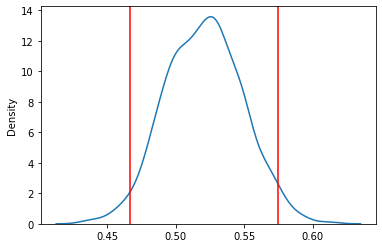

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(means_boot_samples)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')


In [20]:
from sklearn.utils import resample
means_boot_samples = []
for i in range(1000):
                boot_sample = resample(original_sample) # does bootstrap; replace = True
                means_boot_samples.append(boot_sample.mean())
        
np.mean(means_boot_samples)

0.5311023500835692

In [13]:
# uniform distribution
# Variance of unif
# 1. Analytical : use integration
# 2. Sampling distribution from the population  to calculate variance
# 3. use bootstrapping to calculate the mean of the variances



# Var(X) = E(X^2) - (E(X))^2
# E(X^2) = integr( x^2*1) = X^3/3 --> 1/3
# E(X) = integr( X*1) = x^2/2 ==> 1/2
# (E(x))^2 = 1/4

# 1/3 - 1/4 = 1/12 = 0.08333333333

from sklearn.utils import resample
var_boot_samples = []
for i in range(1000):
    boot_sample = resample(original_sample) # does bootstrap; replace = True
    var_boot_samples.append(boot_sample.var())
print(boot_sample.size)
np.mean(var_boot_samples)


1000


0.08270505329938635